Claudia Martinez
Maestria en Inteligencia Artificial Aplicada


# Analisis Univariado

Se va a analizar la columna de glucosa, ya que es la que nos va a dar informacion sobre los valores mas relevantes para la diabetes.

In [2]:
#Primero, debemos cargar las librerías que vamos a utilizar:

import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas

In [4]:
# Paso 1: Cargar el archivo CSV desde una URL en un DataFrame de Pandas 
# Ruta del archivo CSV
ruta_archivo = 'https://raw.githubusercontent.com/claudia-pixel/taller1/main/diabetes.csv'  # Reemplaza con la ruta de tu archivo CSV
# Cargar el archivo CSV en un DataFrame de Pandas 
data = pd.read_csv(ruta_archivo,sep=';')

In [5]:
data.describe() #estadisticos descriptivos

,Embarazos,Glucosa,Presion arterial,Espesor de la sangre,Insulina,BMI(indice de masa corporal),DiabetesPedigreeFunction,Edad,Clase
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
# Paso 2: Análisis Exploratorio de datos simplificado

# Puedes imprimir información básica sobre el conjunto de datos

print("Información del conjunto de datos:")
print(data.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Embarazos                     2000 non-null   int64  
 1   Glucosa                       2000 non-null   int64  
 2   Presion arterial              2000 non-null   int64  
 3   Espesor de la sangre          2000 non-null   int64  
 4   Insulina                      2000 non-null   int64  
 5   BMI(indice de masa corporal)  2000 non-null   float64
 6   DiabetesPedigreeFunction      2000 non-null   float64
 7   Edad                          2000 non-null   int64  
 8   Clase                         2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


In [7]:
# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
         Embarazos      Glucosa  Presion arterial  Espesor de la sangre  \
count  2000.000000  2000.000000       2000.000000           2000.000000   
mean      3.703500   121.182500         69.145500             20.935000   
std       3.306063    32.068636         19.188315             16.103243   
min       0.000000     0.000000          0.000000              0.000000   
25%       1.000000    99.000000         63.500000              0.000000   
50%       3.000000   117.000000         72.000000             23.000000   
75%       6.000000   141.000000         80.000000             32.000000   
max      17.000000   199.000000        122.000000            110.000000   

          Insulina  BMI(indice de masa corporal)  DiabetesPedigreeFunction  \
count  2000.000000                   2000.000000               2000.000000   
mean     80.254000                     32.193000                  0.470930   
std     111.180534                      8.149901              

In [8]:
# Paso 3: Preprocesamiento de datos 
# Algo de limpieza de datos
# eliminamos los nulos
data = data.dropna()

In [80]:
# mostramos nuevemamente la información general del dataset 
# para verificar que no hayan nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Clase                     2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


iniciamos los vectores

In [10]:
vector_media=[]
vector_mediana=[]
vector_moda=[]
vector_rango=[]
vector_varianza=[]
vector_desviacion=[]
maximo=[]
minimo=[] 

In [11]:
resultado = data['Glucosa'] #separando el dataframe por la variable Glucose.
resultado

0       138
1        84
2       145
3       135
4       139
       ... 
1995     75
1996    179
1997     85
1998    129
1999     81
Name: Glucosa, Length: 2000, dtype: int64

Encontrar la media

In [12]:
media = np.mean(resultado)
vector_media.append(media)
media

121.1825

Encontrar la mediana

In [13]:
mediana = np.median(resultado)
vector_mediana.append(mediana)
mediana

117.0

Calcular rango

In [14]:
rango = np.max(resultado) - np.min(resultado)
vector_rango.append(rango)
maximo = np.max(resultado)
minimo = np.min(resultado)
rango

199

Calcular varianza

In [87]:
varianza = np.var(resultado)
vector_varianza.append(varianza)
varianza

1027.8831937500001

In [ ]:
Calcular desviacion estandar

In [88]:
desviacion = np.std(resultado)
vector_desviacion.append(desviacion)
desviacion

32.06061748859495

Interpretacion:

La media y la mediana muestran que la glucosa de los pacientes esta en un promedio de aproximadamente 121-117.
El rango muestra que la glucosa de los pacientes varia entre 0 y 199. 
La varianza y la desviacion estandar indican que el valor de la glucosa se dispersa aproximadamente 1027.88 alrededor de la media.

<Axes: xlabel='Glucosa', ylabel='Edad'>

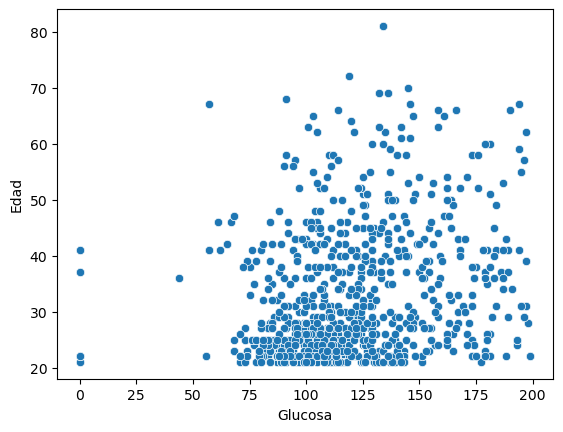

In [15]:
sns.scatterplot(data=data, x='Glucosa', y='Edad')

El diagrama de dispersion muestra una relacion fuerte entre las variables. una glucosa mayor a 75 revela que es mas propenso a sufrir diabetes, con respecto a la edad. 

In [16]:
df = data.copy() #copia de dataframe

In [17]:
df.describe()

,Embarazos,Glucosa,Presion arterial,Espesor de la sangre,Insulina,BMI(indice de masa corporal),DiabetesPedigreeFunction,Edad,Clase
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


(array([ 13.,   0.,  10.,  75., 422., 527., 431., 245., 160., 117.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

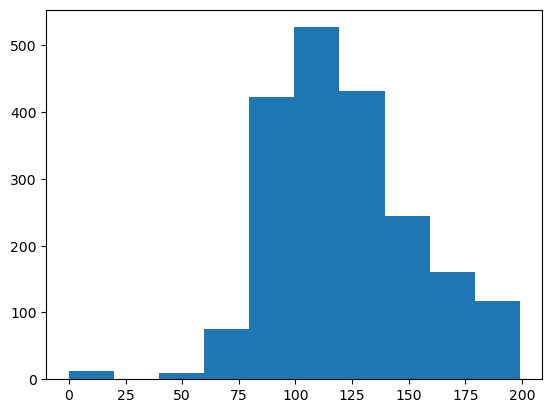

In [24]:
plt.hist(df['Glucosa'])

In [102]:
np.corrcoef(df['Glucose'], data['Age']) #matriz de correlacion

array([[1.        , 0.25986369],
       [0.25986369, 1.        ]])

Conclusion
La correlación entre todas las características es únicamente positiva. Por lo tanto, si un valor aumenta los demas valores aumentaran directamente proporcional.

<Axes: xlabel='Clase', ylabel='Age'>

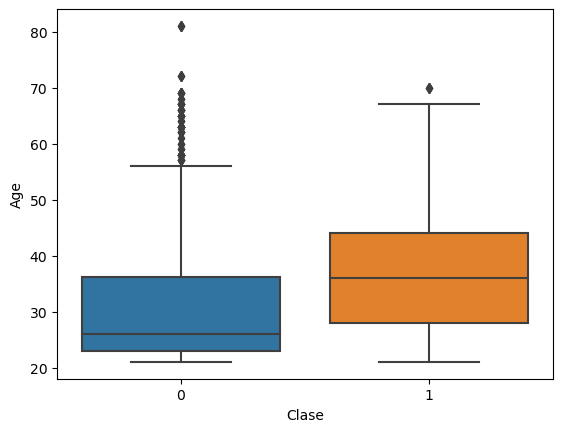

In [105]:
sns.boxplot(data=df,y = df['Age'],x = 'Clase')

Conclusion
Entre mas edad mas probabilidad de contraer diabetes. Si es mayor de 40 años es mas alta la probabilidad de tener diabetes.

<Axes: xlabel='Clase', ylabel='Glucose'>

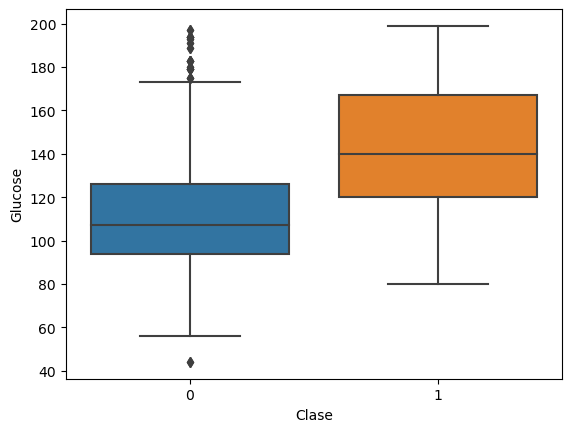

In [106]:
sns.boxplot(data=df,y = df['Glucose'],x = df['Clase'])

Conclusion
Si el nivel de glucosa está por encima de 120 la probabilidad de tener diabetes es mayor.

<Axes: xlabel='Clase', ylabel='BloodPressure'>

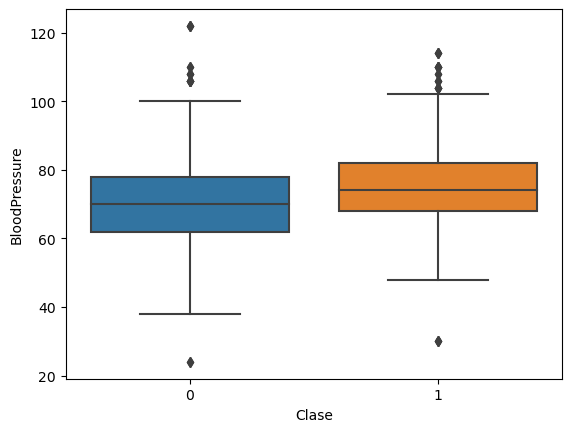

In [107]:
sns.boxplot(data=df,y = df['BloodPressure'],x = df['Clase'])

In [ ]:
Conclusion
Si la presion es mas de 80, la probabilidad de tener diabetes es mas alta.

<Axes: xlabel='Clase', ylabel='SkinThickness'>

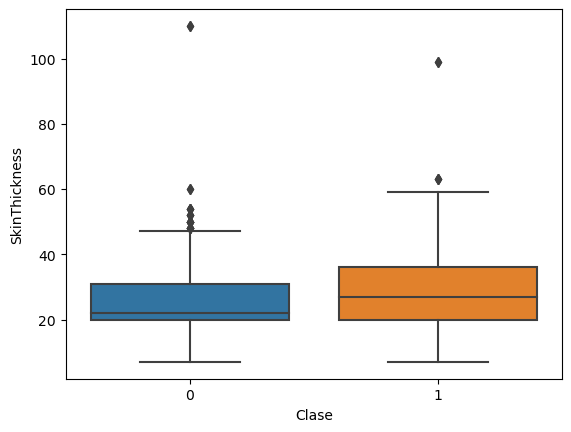

In [108]:
sns.boxplot(data=df,y = df['SkinThickness'],x = df['Clase'])

In [ ]:
Conclusion
Entre mas gruesa la piel mas alta la posibilidad de tener diabetes.

<Axes: xlabel='Clase', ylabel='Insulin'>

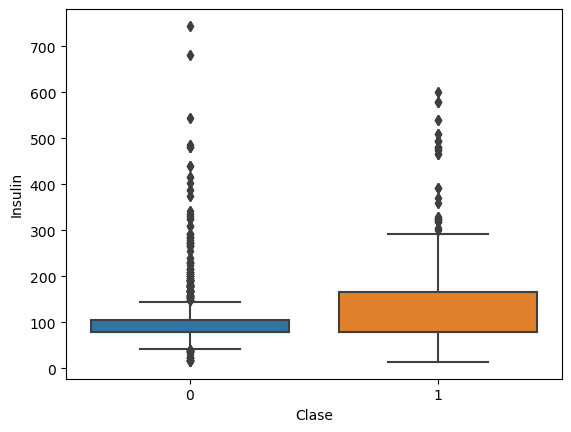

In [109]:
sns.boxplot(data=df,y = df['Insulin'],x = 'Clase')

Conclusion
valores de insulina mayores a 100 tendra mas posibilidad de tener diabetes

<Axes: xlabel='Clase', ylabel='BMI'>

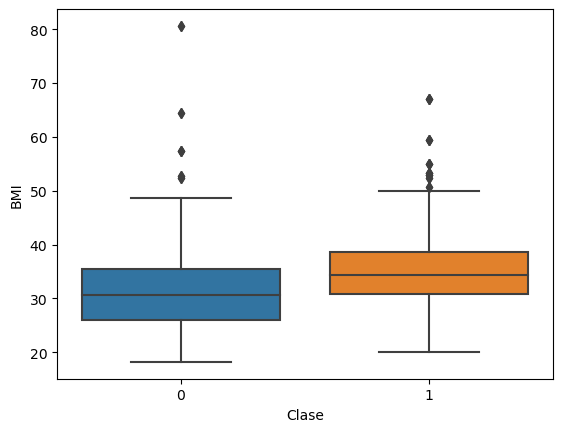

In [111]:
sns.boxplot(data=df,y = df['BMI'],x = 'Clase')

Conclusion
entre mas indice de masa corporal mas posibilidad de tener diabetes. si el indice de masa corporal es mayor a 35 mayor es el riesgo

<Axes: xlabel='Clase', ylabel='DiabetesPedigreeFunction'>

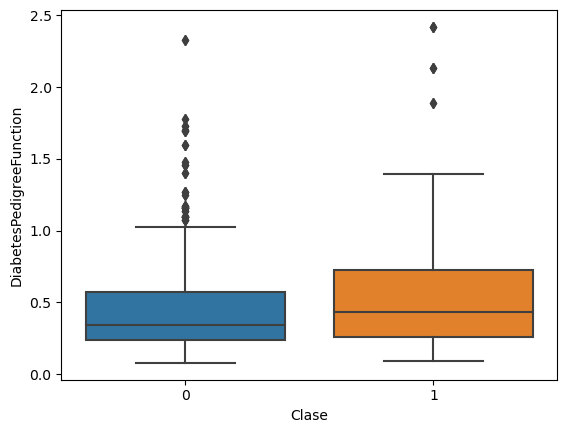

In [112]:
sns.boxplot(data=df,y = df['DiabetesPedigreeFunction'],x = 'Clase')

Conclusion
El valor PDF aumenta muy poco con respecto a los valores de diabetes

CONCLUSION

Todas las variables que estan en el dataset: Embarazos,	Glucosa,Presion arterial,Espesor de la sangre,Insulina,BMI(indice de masa corporal), DiabetesPedigreeFunction,Edad,Clase. Nos muestran una correlacion fuerte entre ellas ya que cualquier valor que incremente con respecto a la glucosa aumentara la probabilidad de sufrir diabetes. 
a mayor edad mayor probabilidad de tener diabetes
a mayor numero de embarazos mayor probabilidad de tener diabetes
a mayor BMI(indice de masa corporal) mayor probabilidad de padecer diabetes
a mayor presion arterial mayor probabilidad de tener diabetes
a mayor porcentaje de insulina mayor posibilidad de padecer diabetes